# Individual and combined block visualization script

In order to analyze the block creation and therefore the dataset creation, in this notebook the blocks will be visualized individually and alongside each other to visually inspect whether the blocking had the desired effect.

## Imports

In [120]:
# For paths
import os 

# For data processing
import numpy as np
import math

# For 3D visualization
import open3d as o3d
import matplotlib.pyplot as plt

## General variables needed

Below all the variables for loading the correct data will be set. This includes the block number to be investigated as well as the creation of the correct path to the respective file.

In [121]:
# Setting parameters for data loading
machine = 'laptop' #'laptop' / 'machine'
if machine == 'laptop':
    path_to_sample = '/Users/nk/Documents/GitHubRepos/Pointnet_Pointnet2_pytorch/data/samples/train/sample_0'
else:
    path_to_sample = 'will be inserted'

# 1. Single block visualization

We will start out with the visualization of a single block. Therefore, the corresponding block will have to be loaded in and subsequently visualised, once within open3d and once with matplotlib.

## 1.1 Block data loading

### 1.1.1 Block choice

In [122]:
block_id = 26
path_to_block = os.path.join(path_to_sample, f'block_{block_id}.npy')

### 1.1.2 Block loading

In [123]:
# Loading in the corresponding block
viz_block = np.load(path_to_block)

# Assigning xyz coordinates
x_block = viz_block[:,0]
y_block = viz_block[:,1]
z_block = viz_block[:,2]

# Assiging color channels 
red_c = viz_block[:,3]
green_c = viz_block[:,4]
blue_c = viz_block[:,5]
# Shifting color range to be between [0, 1]
red_c = (red_c - np.min(red_c)) / (np.max(red_c) - np.min(red_c))
green_c = (green_c - np.min(green_c)) / (np.max(green_c) - np.min(green_c))
blue_c = (blue_c - np.min(blue_c)) / (np.max(blue_c) - np.min(blue_c))
# Creating individual color arrray
block_rgb_list = np.ones((viz_block.shape[0], 3))
block_rgb_list[:, 0] = red_c
block_rgb_list[:, 1] = green_c
block_rgb_list[:, 2] = blue_c 

## 1.2 Block visualization

Now, all information is in place to visualize the single block. Below, the block will be visualized normally first and secondly from the bird perspective, in order to investigate its shape

### 1.2.1 Regular view

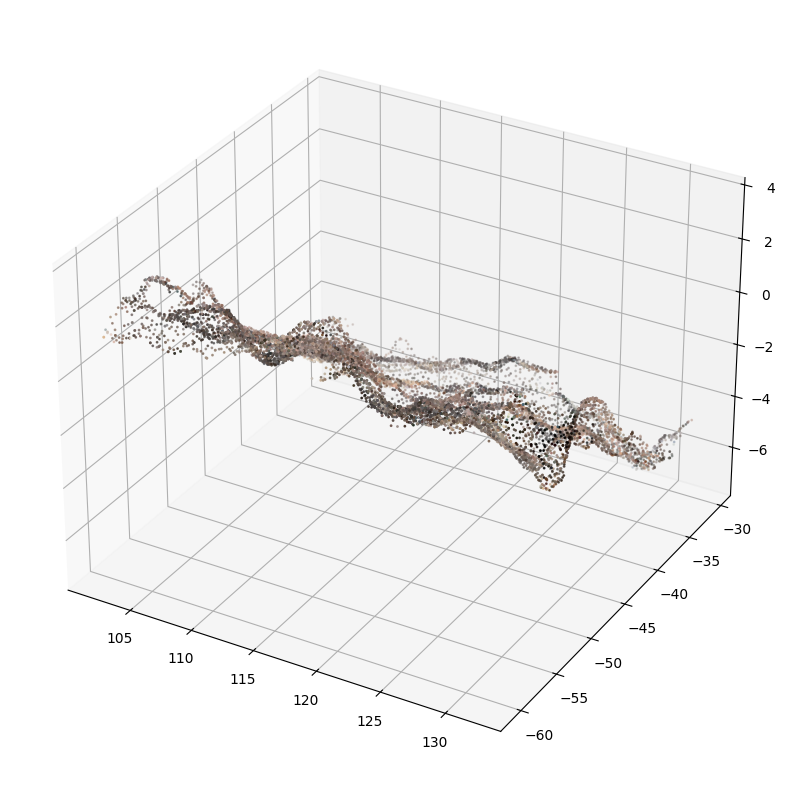

In [124]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x_block, y_block, z_block, c=block_rgb_list, s=1)
plt.show()

### 1.2.2 Birds perspective

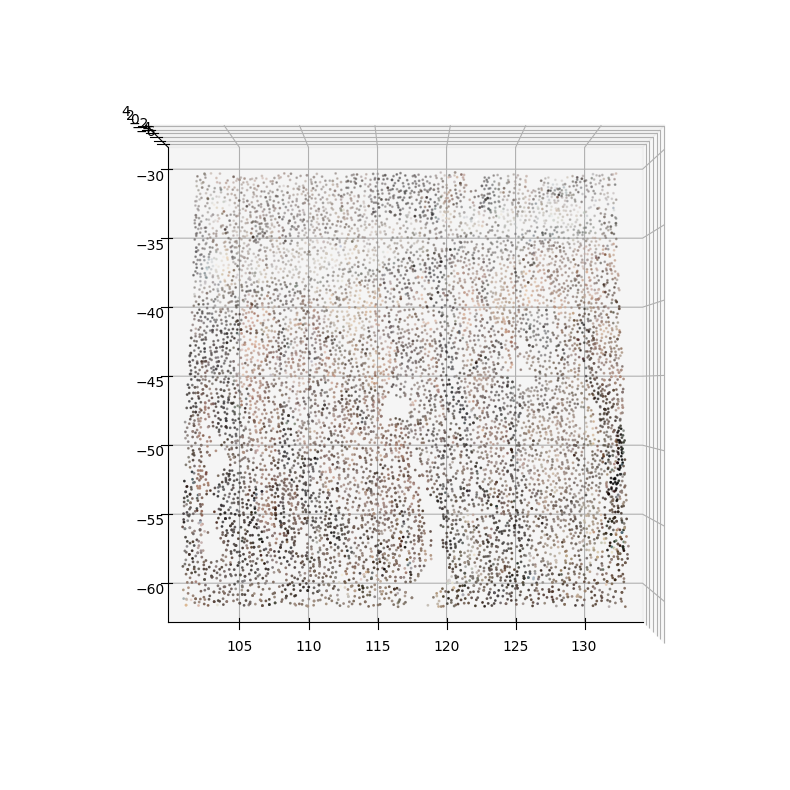

In [125]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x_block, y_block, z_block, c=block_rgb_list, s=1)
ax.view_init(elev=90, azim=-90)
plt.show()

### 1.2.3 With entire sample

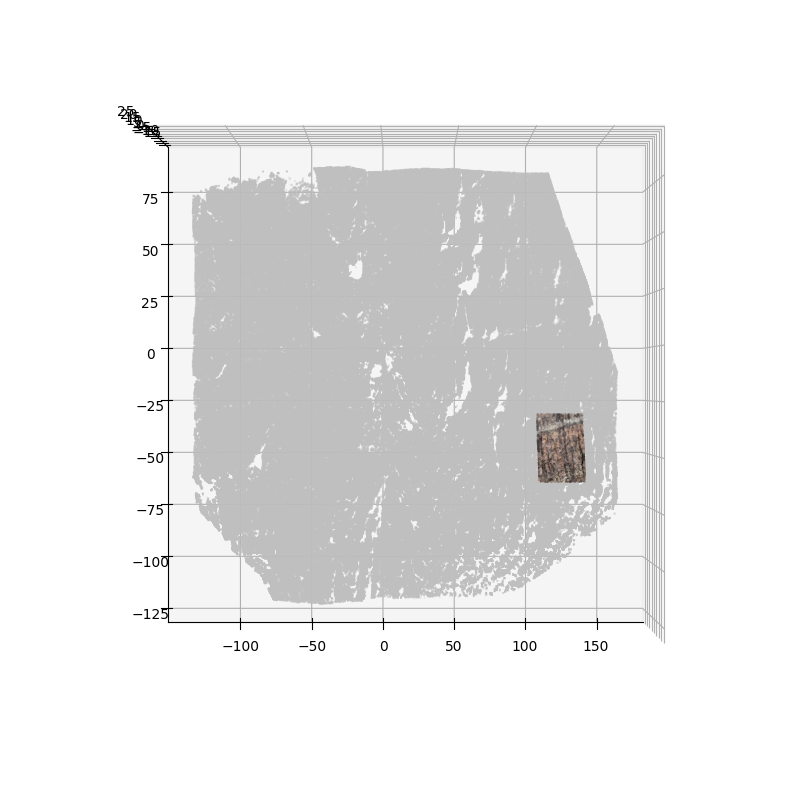

In [126]:
# Loading in the entire sample
sample_points_list = []
for i in range(len(os.listdir(path_to_sample))):
    block_points = np.load(os.path.join(path_to_sample, f'block_{i}.npy'))
    sample_points_list.extend(block_points)
sample_points = np.array(sample_points_list)

# Assigning sample xyz vcoordinates
x_sample = sample_points[:,0]
y_sample = sample_points[:,1]
z_sample = sample_points[:,2]

# Creating grey color rgb list
sample_rgb_list_col = [0.75] * len(sample_points)
sample_rgb_list = np.stack((sample_rgb_list_col, sample_rgb_list_col, sample_rgb_list_col), axis=1)

# Elevation of block for visualization over entire sample
z_block += 20

# Display of entire sample
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x_sample, y_sample, z_sample, c=sample_rgb_list, s=0.05)
ax.scatter(x_block, y_block, z_block, c=block_rgb_list, s=0.1)
ax.view_init(elev=90, azim=-90)
plt.show()

## 1.3 Single block statistics

In order to get an even better picture of the individual block, we will also investigate the block not only visually, but also considering its key statistics.

In [127]:
# Determining number of unique points in block
num_unique_points = len(np.unique(viz_block, axis=0))

# Number of point repetitions in sample
num_repeated_points = len(viz_block) - num_unique_points

# Determining minimum and maximum coordinates
block_min = np.min(viz_block[:, :3], axis=0)
block_max = np.max(viz_block[:, :3], axis=0)

# Determining block center
block_center_x = block_min[0] + (block_max[0]-block_min[0])/2
block_center_y = block_min[1] + (block_max[1]-block_min[1])/2
block_center = [block_center_x, block_center_y, 0]
block_mean = np.mean(viz_block[:, :3], axis=0)

# Printing block stats
print(f'This block starts at: {block_min}')
print(f'This block ends at: {block_max}')
print(f'The true block center is at: {block_center}')
print(f'While the block mean is at: {block_mean}')
print(f'It exhibits {num_unique_points} unique points.')
print(f'And therefore has {num_repeated_points} duplicates.')


This block starts at: [102.02537454 -60.60579961  12.86185208]
This block ends at: [132.01310749 -30.61140259  23.49267008]
The true block center is at: [117.01924101801376, -45.608601101465965, 0]
While the block mean is at: [117.19747297 -45.49501931  18.23247141]
It exhibits 9112 unique points.
And therefore has 1128 duplicates.


# 2. Multiple block visualization

For general analysis it would be interesting to potentially investigate several blocks, either next to each other or distant blocks, and set them into the context of the overall sample as well. Therefore a similar mechanism for mutiple blocks will be prepared below.

## 2.1 Block data loading

### 2.1.1 Block choice

Here the respective blocks will be named/ selected and the paths for loading will be created.

In [135]:
block_ids = [56, 57] #FILL OUT
block_paths = []
for block_id in block_ids:
    path_to_block = os.path.join(path_to_sample, f'block_{block_id}.npy')
    block_paths.append(path_to_block)

### 2.1.2 Data loading

In [136]:
block_data = []
x_blocks = []
y_blocks = []
z_blocks = []
rgb_lists = []
for i in range(len(block_paths)):
    block_i_data = np.load(block_paths[i])
    # Creating general block point list
    block_data.append(block_i_data)
    # Assigning and appending block coordinates
    x_blocks.append(block_i_data[:,0])
    y_blocks.append(block_i_data[:,1])
    z_blocks.append(block_i_data[:,2])
    # Assigning color channels
    red_c = block_i_data[:,3]
    green_c = block_i_data[:,4]
    blue_c = block_i_data[:,5]
    # Normalizing color range
    red_c = (red_c - np.min(red_c)) / (np.max(red_c) - np.min(red_c))
    green_c = (green_c - np.min(green_c)) / (np.max(green_c) - np.min(green_c))
    blue_c = (blue_c - np.min(blue_c)) / (np.max(blue_c) - np.min(blue_c))    
    # Creating and appending RGB list
    block_i_rgb_list = np.ones((block_i_data.shape[0], 3))
    block_i_rgb_list[:, 0] = red_c
    block_i_rgb_list[:, 1] = green_c
    block_i_rgb_list[:, 2] = blue_c
    rgb_lists.append(block_i_rgb_list)    

## 2.2 Blocks visualization

### 2.2.1 Regular view

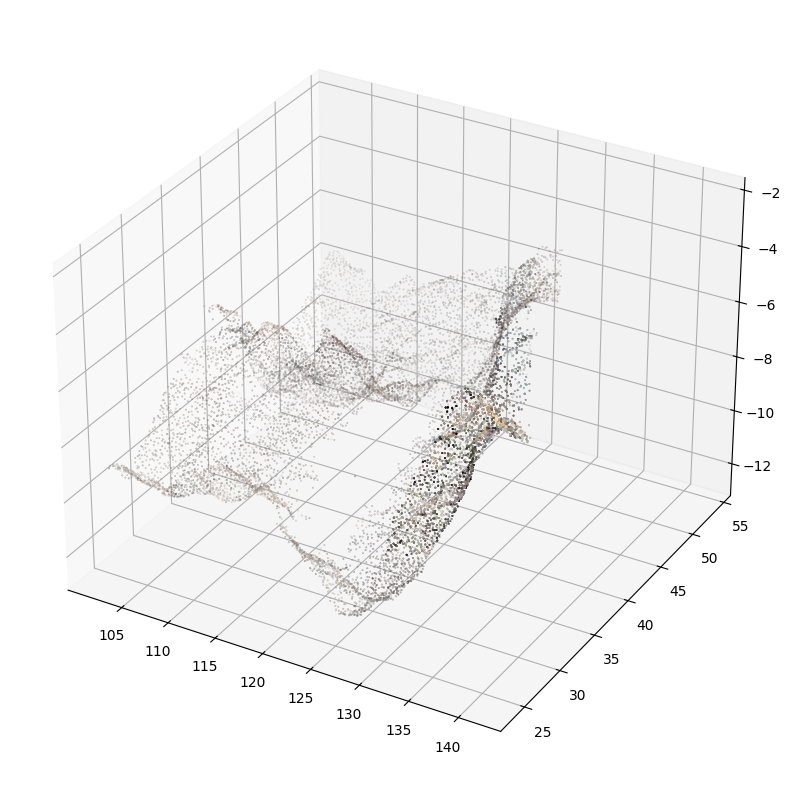

In [141]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
for i in range(len(rgb_lists)):
    ax.scatter(x_blocks[i], y_blocks[i], z_blocks[i], c=rgb_lists[i], s=0.1)
plt.show()

### 2.2.2 Birds-perspective

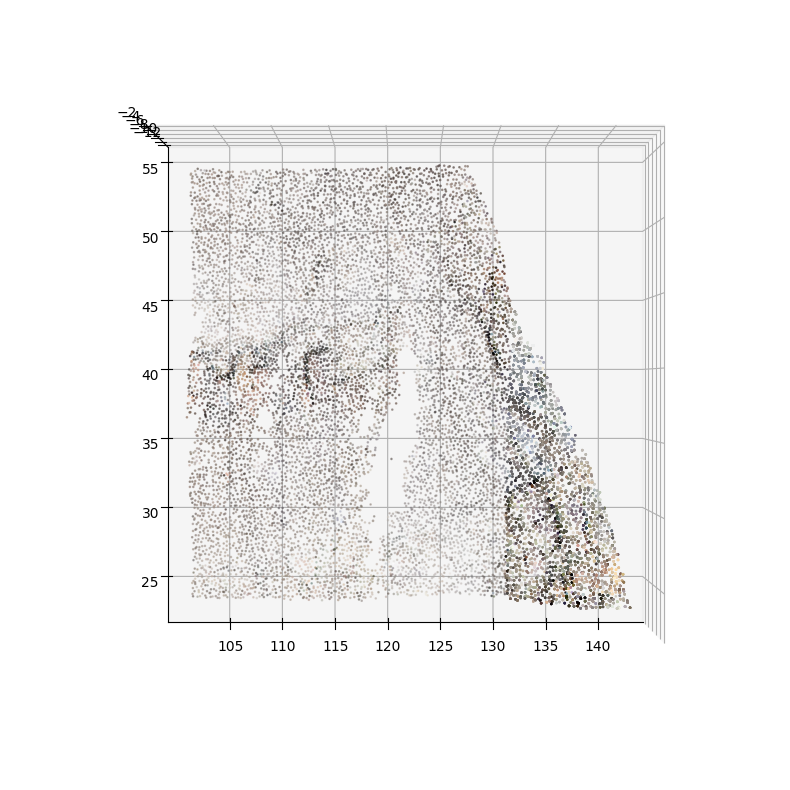

In [142]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
for i in range(len(rgb_lists)):
    ax.scatter(x_blocks[i], y_blocks[i], z_blocks[i], c=rgb_lists[i], s=0.75)
ax.view_init(elev=90, azim=-90)
plt.show()

### 2.2.3 With entire sample

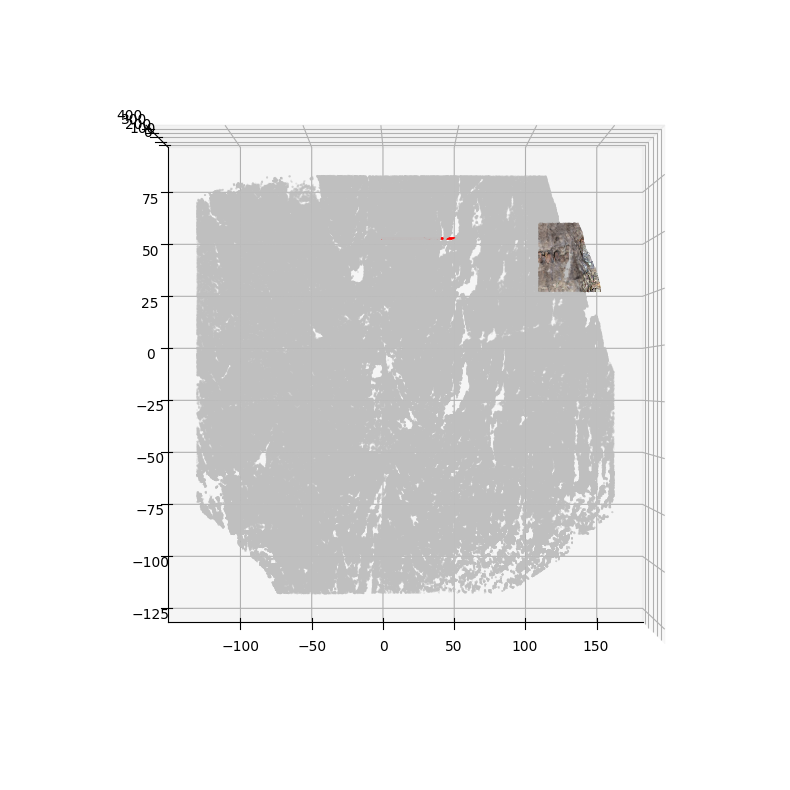

In [161]:
# Loading in the entire sample
sample_points_list = []
for i in range(len(os.listdir(path_to_sample))):
    block_points = np.load(os.path.join(path_to_sample, f'block_{i}.npy'))
    sample_points_list.extend(block_points)
sample_points = np.array(sample_points_list)

# Assigning sample xyz vcoordinates
x_sample = sample_points[:,0]
y_sample = sample_points[:,1]
z_sample = sample_points[:,2]

# Creating grey color rgb list
sample_rgb_list_col = [0.75] * len(sample_points)
sample_rgb_list = np.stack((sample_rgb_list_col, sample_rgb_list_col, sample_rgb_list_col), axis=1)

# Elevation of block for visualization over entire sample
for i in range(len(z_blocks)):
    z_blocks[i] = z_blocks[i] + 30

# Display of entire sample
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x_sample, y_sample, z_sample, c=sample_rgb_list, s=0.05)
for i in range(len(rgb_lists)):
    ax.scatter(x_blocks[i], y_blocks[i], z_blocks[i], c=rgb_lists[i], s=0.1)
ax.view_init(elev=90, azim=-90)
plt.show()

## 2.3 Multiple blocks statistics

In [164]:
# Determining the number of unique points per block
num_unique_points_list = []
num_repeated_points_list = []
block_mins = []
block_maxs = []
block_means = []
block_centers = []
for i in range(len(rgb_lists)):
    block_i_num_unique_points = len(np.unique(block_data[i], axis=0))
    block_i_min = np.min(block_data[i][:,:3], axis=0)
    block_i_max = np.max(block_data[i][:,:3], axis=0)
    block_i_mean = np.mean(block_data[i][:,:3], axis=0)
    block_i_x_center = block_i_min[0] + (block_i_max[0]-block_i_min[0])/2
    block_i_y_center = block_i_min[1] + (block_i_max[1]-block_i_min[1])/2
    block_i_center = [block_i_x_center, block_i_y_center, 0]
    # Appending relevant info
    num_unique_points_list.append(block_i_num_unique_points)
    num_repeated_points_list.append(len(block_data[i])-block_i_num_unique_points)
    block_mins.append(block_i_min)
    block_maxs.append(block_i_max)
    block_means.append(block_i_mean)
    block_centers.append(block_i_center)

# Printing block statistics
for i in range(len(rgb_lists)):
    print(f'---------- Statistics for block {block_ids[i]} ----------')
    print(f'This block starts at: {block_mins[i]}')
    print(f'This block ends at: {block_maxs[i]}')
    print(f'The true block center is at: {block_centers[i]}')
    print(f'While the block mean is at: {block_means[i]}')
    print(f'Hence the block gravity center in comparison to the true center ifs off by: {block_centers[i][:2] - block_means[i][:2]}')
    print(f'It exhibits {num_unique_points_list[i]} unique points.')
    print(f'And therefore has {num_repeated_points_list[i]} duplicates.')

---------- Statistics for block 56 ----------
This block starts at: [102.02898454  23.90220391 -12.46917011]
This block ends at: [132.02265647  53.89558556  -3.0349791 ]
The true block center is at: [117.02582050241077, 38.898894733699024, 0]
While the block mean is at: [116.71476529  38.9617406   -8.60707243]
Hence the block gravity center in comparison to the true center ifs off by: [ 0.31105521 -0.06284587]
It exhibits 10240 unique points.
And therefore has 0 duplicates.
---------- Statistics for block 57 ----------
This block starts at: [130.96478357  23.9030212  -10.26952982]
This block ends at: [141.33644431  43.96900528  -2.2998079 ]
The true block center is at: [136.15061394013634, 33.936013241515624, 0]
While the block mean is at: [134.78724863  30.76233359  -6.14339847]
Hence the block gravity center in comparison to the true center ifs off by: [1.36336531 3.17367965]
It exhibits 1773 unique points.
And therefore has 8467 duplicates.


# 3. Entire sample block visualization and analysis

This is the placeholder for the entire sample analysis. In this section it is not necessarily about displaying and analysing individual blocks, but much rather about how certain characteristics, such as the number of fracture points, unqiue points and centers are distributed among the entire sample. So it may be an idea to display averages for the entire sample and then also displaying the maximum ad minimum values for that range to get a better feeling and understanding of the dispersion and variability of those numbers.

# Conclusion

This notebook contains the functions to display and quickly analyze a single block of the sample, and additionally also being able to take multiple blocks into account and visualize and analyze these individually. From our first inspection and analysis it looks like the blocks have been formed correctly and contain a stable mix of fracture and non-fracture points. Therefore, besides potentially integrating an entire sample block overview and analysis, the visualization and analysis of blocks of a sample can be done with this notebook. 